In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz, process
import math

In [77]:
sv_df = pd.read_excel("../../Dataset/UIT/01.sinhvien.xlsx")
diem_df = pd.read_excel("../../Dataset/UIT/02.diem.xlsx")

## 01.sinhvien

In [78]:
# Xác định các cột dữ liệu và đồng thời loại bỏ các cột trống
sv_columns = sv_df.columns
sv_columns = ['id', 'mssv', ' namsinh', ' gioitinh', ' noisinh', ' lopsh', ' khoa', ' hedt', ' khoahoc', ' chuyennganh2', ' tinhtrang', ' diachi_tinhtp']
sv_df = sv_df[sv_columns]
sv_df.head()

,id,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp
0,1.0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1995.0,1.0,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,3.0,Thành phố Hồ Chí Minh
1,2.0,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1995.0,1.0,Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Huyện Hóc Môn
2,3.0,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1994.0,1.0,Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,Tỉnh Hà Nam
3,4.0,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1995.0,1.0,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Thành phố Hồ Chí Minh
4,5.0,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1995.0,1.0,Thành phố Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,Thành phố Hồ Chí Minh


In [79]:
# Xác định kiểu dữ liệu
sv_df.dtypes

id                float64
mssv               object
 namsinh          float64
 gioitinh         float64
 noisinh           object
 lopsh             object
 khoa              object
 hedt              object
 khoahoc          float64
 chuyennganh2      object
 tinhtrang        float64
 diachi_tinhtp     object
dtype: object

In [80]:
# Tìm kiếm và xóa bỏ các dòng giá trị trống
print(sv_df.isnull().sum())
sv_df = sv_df.dropna(how='all')
print(sv_df.isnull().sum())

id                21
mssv              21
 namsinh          22
 gioitinh         21
 noisinh          21
 lopsh            21
 khoa             21
 hedt             21
 khoahoc          21
 chuyennganh2     21
 tinhtrang        21
 diachi_tinhtp    21
dtype: int64
id                0
mssv              0
 namsinh          1
 gioitinh         0
 noisinh          0
 lopsh            0
 khoa             0
 hedt             0
 khoahoc          0
 chuyennganh2     0
 tinhtrang        0
 diachi_tinhtp    0
dtype: int64


In [81]:
# Xác định các trường dữ liệu liên tục và rời rạc
sv_continuous_feature = [' namsinh']
sv_categorical_feature = [' gioitinh', ' noisinh', ' lopsh', ' khoa', ' hedt', ' khoahoc', ' chuyennganh2', ' tinhtrang', ' diachi_tinhtp']

In [82]:
# Điền dữ liệu thiếu bằng giá trị trung bình
sv_df[sv_continuous_feature] = sv_df[sv_continuous_feature].fillna(sv_df[sv_continuous_feature].mean())

In [83]:
# Thống kê mô tả cơ bản các cột dữ liệu liên tục
sv_df[sv_continuous_feature].describe().round(2)

,namsinh
count,8295.00
mean,1998.23
std,2.21
min,1979.00
25%,1996.00
50%,1998.00
75%,2000.00
max,2001.00


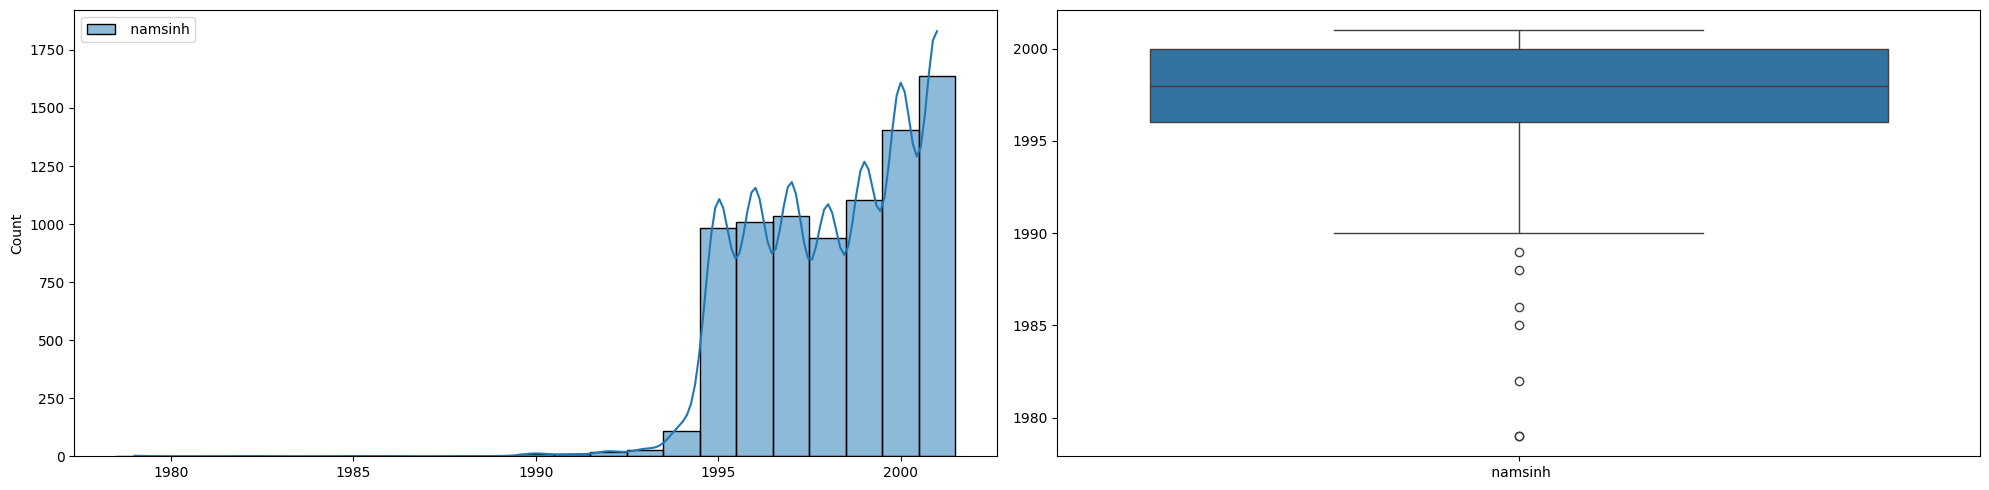

In [84]:
# Trực quan hóa phân bố dữ liệu của các cột dữ liệu liên tục
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(sv_df[sv_continuous_feature], kde=True, discrete=True)
plt.subplot(1,2,2)
sns.boxplot(sv_df[sv_continuous_feature])
plt.tight_layout()
plt.show()

In [85]:
# Chuyển các dữ liệu rời rạc về kiểu chuỗi
for col in sv_categorical_feature:
    sv_df[col] = sv_df[col].apply(lambda x: str(x))

In [86]:
# Xóa các ký tự đặc biệt của các dữ liệu rời rạc
pattern = r'[!\"#\$%&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}~]'
for col in [' noisinh', ' lopsh', ' khoa', ' hedt', ' chuyennganh2', ' diachi_tinhtp']:
    sv_df[col] = sv_df[col].apply(lambda x: re.sub(pattern, '', x))

In [87]:
sv_df

,id,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp
0,1.0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1995.0,1.0,TP Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,3.0,Thành phố Hồ Chí Minh
1,2.0,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1995.0,1.0,Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Huyện Hóc Môn
2,3.0,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1994.0,1.0,Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,Tỉnh Hà Nam
3,4.0,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1995.0,1.0,TP Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Thành phố Hồ Chí Minh
4,5.0,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1995.0,1.0,Thành phố Hồ Chí Minh,MMTT0001,MMTTT,CQUI,8.0,D480201,8.0,Thành phố Hồ Chí Minh
...,...,...,...,...,...,...,...,...,...,...,...,...
8311,19283.0,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,2000.0,1.0,An Giang,MMCL20192,MMTTT,CLC,14.0,7480102,2.0,Tỉnh An Giang
8312,19284.0,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,2001.0,1.0,Bình Thuận,KHMT2019,KHMT,CQUI,14.0,D480101,1.0,Tỉnh Bình Thuận
8313,19285.0,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,2001.0,1.0,Lâm Đồng,KHMT2019,KHMT,CQUI,14.0,D480101,1.0,Tỉnh Lâm Đồng
8314,19345.0,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,2000.0,1.0,Bến Tre,CNTT2019,KTTT,CQUI,14.0,D480201,1.0,Tỉnh Bến Tre


In [88]:
# Xác định các giá trị đặc trưng của dữ liệu rời rạc
# Đồng thời xác định các cột dữ liệu rời rạc đang chứa dữ liệu nhiễu
sv_df[sv_categorical_feature].apply(lambda x: len(x.unique()))

gioitinh           2
noisinh          171
lopsh            159
khoa               6
hedt               5
khoahoc            7
chuyennganh2      12
tinhtrang          8
diachi_tinhtp    763
dtype: int64

In [89]:
# Xử lý dữ liệu rời rạc nhiễu ở 2 cột noisinh và diachi_tinhtp bằng cách chuẩn hóa dữ liệu và đưa dữ liệu về các giá trị chuẩn bằng kỹ thuật khớp mờ
sv_noisinh_clean = sv_df[' noisinh'].apply(lambda x: x.lower().strip()).apply(lambda x: re.sub(r'[^\w\s]', '', x))
sv_noisinh_clean

0              tp hồ chí minh
1                   đồng tháp
2                 hà nam ninh
3              tp hồ chí minh
4       thành phố hồ chí minh
                ...          
8311                 an giang
8312               bình thuận
8313                 lâm đồng
8314                  bến tre
8315    thành phố hồ chí minh
Name:  noisinh, Length: 8295, dtype: object

In [90]:
standard_province = [
    "an giang",
    "bà rịa - vũng tàu",
    "bắc giang",
    "bắc kạn",
    "bạc liêu",
    "bắc ninh",
    "bến tre",
    "bình định",
    "bình dương",
    "bình phước",
    "bình thuận",
    "cà mau",
    "cần thơ",
    "cao bằng",
    "đà nẵng",
    "đắk lắk",
    "đắk nông",
    "điện biên",
    "đồng nai",
    "đồng tháp",
    "gia lai",
    "hà giang",
    "hà nam",
    "hà nội",
    "hà tĩnh",
    "hải dương",
    "hải phòng",
    "hậu giang",
    "hòa bình",
    "hưng yên",
    "khánh hòa",
    "kiên giang",
    "kon tum",
    "lai châu",
    "lâm đồng",
    "lào cai",
    "long an",
    "nam định",
    "nghệ an",
    "ninh bình",
    "ninh thuận",
    "phú thọ",
    "phú yên",
    "quảng bình",
    "quảng nam",
    "quảng ngãi",
    "quảng ninh",
    "quảng trị",
    "sóc trăng",
    "sơn la",
    "tây ninh",
    "thái bình",
    "thái nguyên",
    "thanh hóa",
    "thừa thiên huế",
    "tiền giang",
    "thành phố hồ chí minh",
    "trà vinh",
    "tuyên quang",
    "vĩnh long",
    "vĩnh phúc",
    "yên bái",
    "bắc liêu"
]

In [91]:
sv_noising_fuzzy_matching = sv_df[' noisinh'].apply(lambda x: process.extractOne(x, standard_province)).apply(lambda x: x[0])

In [92]:
sv_df[' noisinh'] = sv_noising_fuzzy_matching

In [93]:
sv_diachi_clean = sv_df[' diachi_tinhtp'].apply(lambda x: x.lower().strip()).apply(lambda x: re.sub(r'[^\w\s]', '', x))
sv_diachi_clean

0       thành phố hồ chí minh
1               huyện hóc môn
2                 tỉnh hà nam
3       thành phố hồ chí minh
4       thành phố hồ chí minh
                ...          
8311            tỉnh an giang
8312          tỉnh bình thuận
8313            tỉnh lâm đồng
8314             tỉnh bến tre
8315       thành phố biên hoà
Name:  diachi_tinhtp, Length: 8295, dtype: object

In [94]:
sv_diachi_fuzzy_matching = sv_df[' diachi_tinhtp'].apply(lambda x: process.extractOne(x, standard_province)).apply(lambda x: x[0])

In [95]:
sv_df[' diachi_tinhtp'] = sv_diachi_fuzzy_matching

In [96]:
province_to_region = {
    "an giang": "Mekong Delta",
    "bà rịa - vũng tàu": "Ho Chi Minh - East",
    "bắc giang": "North",
    "bắc kạn": "North",
    "bạc liêu": "Mekong Delta",
    "bắc ninh": "North",
    "bến tre": "Mekong Delta",
    "bình định": "Central",
    "bình dương": "Ho Chi Minh - East",
    "bình phước": "Ho Chi Minh - East",
    "bình thuận": "Ho Chi Minh - East",
    "cà mau": "Mekong Delta",
    "cần thơ": "Mekong Delta",
    "cao bằng": "North",
    "đà nẵng": "Central",
    "đắk lắk": "Central",
    "đắk nông": "Central",
    "điện biên": "North",
    "đồng nai": "Ho Chi Minh - East",
    "đồng tháp": "Mekong Delta",
    "gia lai": "Central",
    "hà giang": "North",
    "hà nam": "North",
    "hà nội": "North",
    "hà tĩnh": "Central",
    "hải dương": "North",
    "hải phòng": "North",
    "hậu giang": "Mekong Delta",
    "hòa bình": "North",
    "hưng yên": "North",
    "khánh hòa": "Central",
    "kiên giang": "Mekong Delta",
    "kon tum": "Central",
    "lai châu": "North",
    "lâm đồng": "Central",
    "lào cai": "North",
    "long an": "Mekong Delta",
    "nam định": "North",
    "nghệ an": "Central",
    "ninh bình": "North",
    "ninh thuận": "Central",
    "phú thọ": "North",
    "phú yên": "Central",
    "quảng bình": "Central",
    "quảng nam": "Central",
    "quảng ngãi": "Central",
    "quảng ninh": "North",
    "quảng trị": "Central",
    "sóc trăng": "Mekong Delta",
    "sơn la": "North",
    "tây ninh": "Ho Chi Minh - East",
    "thái bình": "North",
    "thái nguyên": "North",
    "thanh hóa": "Central",
    "thừa thiên huế": "Central",
    "tiền giang": "Mekong Delta",
    "thành phố hồ chí minh": "Ho Chi Minh - East",
    "trà vinh": "Mekong Delta",
    "tuyên quang": "North",
    "vĩnh long": "Mekong Delta",
    "vĩnh phúc": "North",
    "yên bái": "North",
    "bắc liêu": "Mekong Delta"
}

In [97]:
# Chuyển dữ liệu nơi sinh và địa chỉ về 4 vùng địa lý chỉnh của Việt Nam: North, Central, Ho Chi Minh - East, Mekong Delta
sv_df['noisinh_vung'] = sv_df[' noisinh'].apply(lambda x: province_to_region[x])
sv_df['diachi_vung'] = sv_df[' diachi_tinhtp'].apply(lambda x: province_to_region[x])

In [98]:
sv_df[' diachi_tinhtp'] = sv_df[' diachi_tinhtp'].apply(lambda x: x.title())
sv_df[' noisinh'] = sv_df[' noisinh'].apply(lambda x: x.title())

In [99]:
# Chuyển dữ liệu ở cột lopsh thành cột nganhhoc khi chỉ lấy thông tin ngành học bằng cách xóa các ký tự số 
sv_df['nganhhoc'] = sv_df[' lopsh'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))

In [100]:
# Thống kê mô tả cơ bản dữ liệu rời rạc
sv_df[sv_categorical_feature].describe()

,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp
count,8295,8295,8295,8295,8295,8295,8295,8295,8295
unique,2,60,159,6,5,7,12,8,61
top,1.0,Thành Phố Hồ Chí Minh,KTPM0001,MMTTT,CQUI,14.0,D480103,1.0,Thành Phố Hồ Chí Minh
freq,7232,1633,541,1796,5091,1718,1467,4342,1446


In [101]:
sv_categorical_feature.extend(['noisinh_vung', 'diachi_vung', 'nganhhoc'])
sv_categorical_plot_feature = sv_categorical_feature.copy()
sv_categorical_plot_feature.remove(' noisinh')
sv_categorical_plot_feature.remove(' diachi_tinhtp')
sv_categorical_plot_feature.remove(' lopsh')

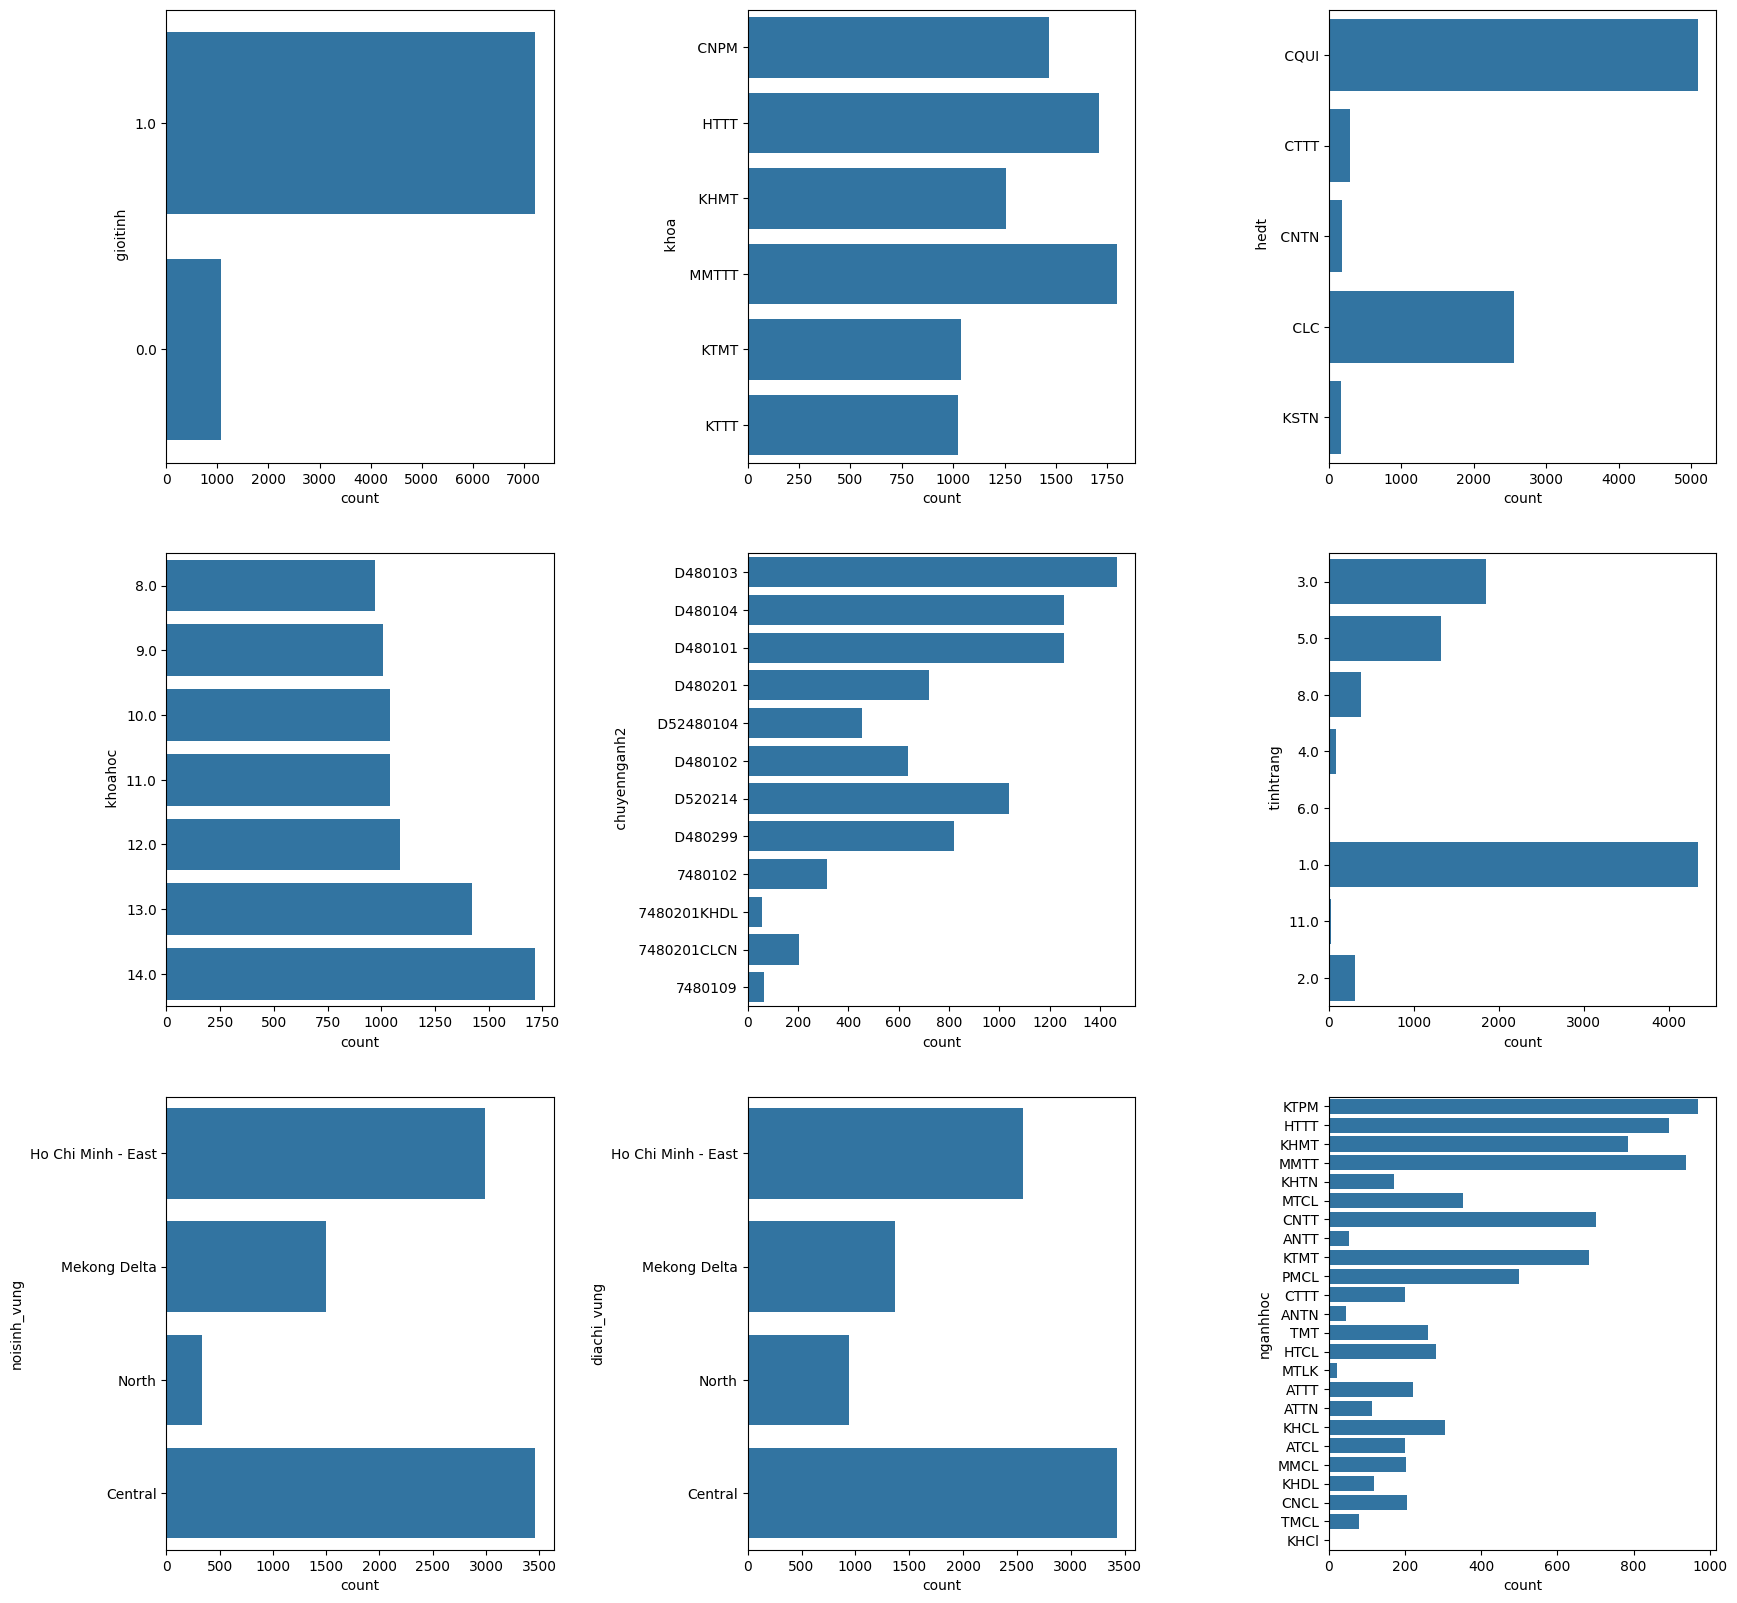

In [102]:
# Trực quan hóa tần suất các giá trị đặc trưng dữ liệu rời rạc
col = 3
row = int(math.ceil(len(sv_categorical_plot_feature) / col))
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.5, hspace=0.2)
for index, df_col in enumerate(sv_categorical_plot_feature):
    plt.subplot(row, col, index + 1)
    sns.countplot(sv_df[df_col])
plt.show()

In [103]:
# Xuất dữ liệu sau khi xử lý
sv_df.to_excel("processed_01_sinhvien.xlsx")

## 02.diem

In [104]:
diem_columns = diem_df.columns
diem_df.head()

,id,mssv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,mamh_tt
0,137424.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,CS1113,CS1113.D11,4.0,2012.0,1.0,0.0,2.0,NULL
1,140865.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,PH001,PH001.D11,4.0,2012.0,1.0,0.0,1.0,NULL
2,141624.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ENGL1113,ENGL1113.D11CTTT,3.0,2012.0,1.0,0.0,2.0,NULL
3,141651.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ADENG1,ADENG1.D11CTTT,0.0,2012.0,1.0,0.0,2.0,NULL
4,141684.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,SS001,SS001.D11CTTT,5.0,2012.0,1.0,0.0,2.0,NULL


In [105]:
diem_columns

Index(['id', 'mssv', ' mamh', ' malop', ' sotc', ' namhoc', ' hocky', ' diem',
       ' trangthai', ' mamh_tt'],
      dtype='object')

In [106]:
# Xác định kiểu dữ liệu
diem_df.dtypes

id            float64
mssv           object
 mamh          object
 malop         object
 sotc         float64
 namhoc       float64
 hocky        float64
 diem         float64
 trangthai    float64
 mamh_tt       object
dtype: object

In [107]:
# Tìm kiếm và xóa bỏ các dòng giá trị trống
print(diem_df.isnull().sum())
diem_df = diem_df.dropna(how='all')
print(diem_df.isnull().sum())

id            79099
mssv            136
 mamh           136
 malop          136
 sotc           136
 namhoc         136
 hocky          136
 diem           171
 trangthai      136
 mamh_tt        136
dtype: int64
id            78963
mssv              0
 mamh             0
 malop            0
 sotc             0
 namhoc           0
 hocky            0
 diem            35
 trangthai        0
 mamh_tt          0
dtype: int64


In [108]:
# Xác định các trường dữ liệu liên tục và rời rạc
diem_continuous_feature = [' sotc', ' diem']
diem_categorical_feature = [' mamh', ' malop', ' namhoc', ' hocky', ' trangthai', ' mamh_tt']

In [109]:
# Điền dữ liệu thiếu bằng giá trị trung bình
diem_df[diem_continuous_feature] = diem_df[diem_continuous_feature].fillna(diem_df[diem_continuous_feature].mean())

In [110]:
# Thống kê mô tả cơ bản các cột dữ liệu liên tục
diem_df[diem_continuous_feature].describe().round(2)

,sotc,diem
count,98963.00,98963.00
mean,3.21,6.33
std,1.16,2.38
min,0.00,0.00
25%,3.00,5.30
50%,4.00,6.90
75%,4.00,8.00
max,5.00,10.00


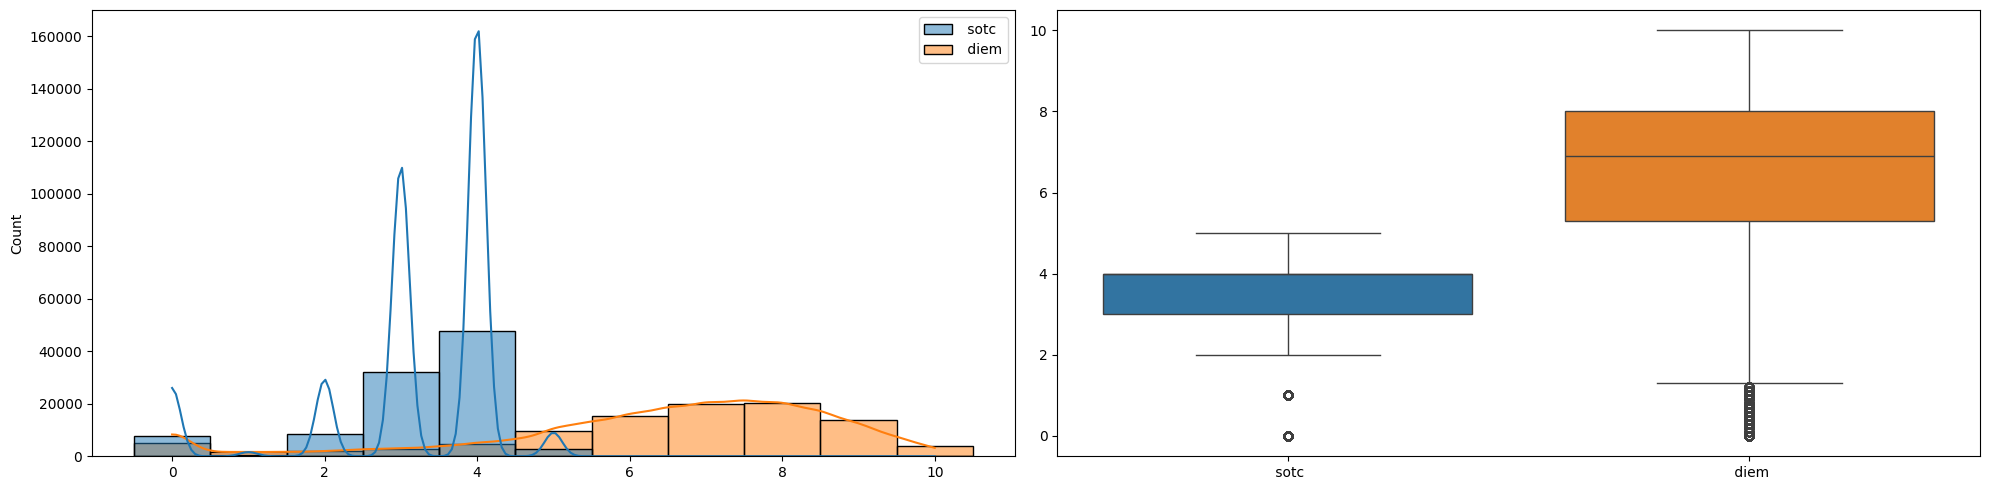

In [111]:
# Trực quan hóa phân bố dữ liệu của các cột dữ liệu liên tục
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(diem_df[diem_continuous_feature], kde=True, discrete=True)
plt.subplot(1,2,2)
sns.boxplot(diem_df[diem_continuous_feature])
plt.tight_layout()
plt.show()

In [112]:
# Chuyển các dữ liệu rời rạc về kiểu chuỗi
for col in diem_categorical_feature:
    diem_df[col] = diem_df[col].apply(lambda x: int(x) if type(x) == 'float' else str(x))

In [ ]:
# Xóa các ký tự đặc biệt của các dữ liệu rời rạc
pattern = r'[!\"#\$%&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}~]'
for col in [' mamh', ' malop', ' mamh_tt']:
    diem_df[col] = diem_df[col].apply(lambda x: re.sub(pattern, '', x))

In [114]:
# Xác định các giá trị đặc trưng của dữ liệu rời rạc
# Đồng thời xác định các cột dữ liệu rời rạc đang chứa dữ liệu nhiễu
diem_df[diem_categorical_feature].apply(lambda x: len(x.unique()))

mamh          226
malop        1960
namhoc          5
hocky           3
trangthai       6
mamh_tt         7
dtype: int64

In [115]:
# Thống kê mô tả cơ bản dữ liệu rời rạc
diem_df[diem_categorical_feature].describe()

,mamh,malop,namhoc,hocky,trangthai,mamh_tt
count,98963,98963,98963,98963,98963,98963
unique,226,1960,5,3,6,7
top,MA001,SS001E15,2015.0,1.0,1.0,NULL
freq,4775,214,34703,58227,85539,98951


In [116]:
diem_categorical_plot_feature = diem_categorical_feature.copy()
diem_categorical_plot_feature.remove(' mamh')
diem_categorical_plot_feature.remove(' malop')

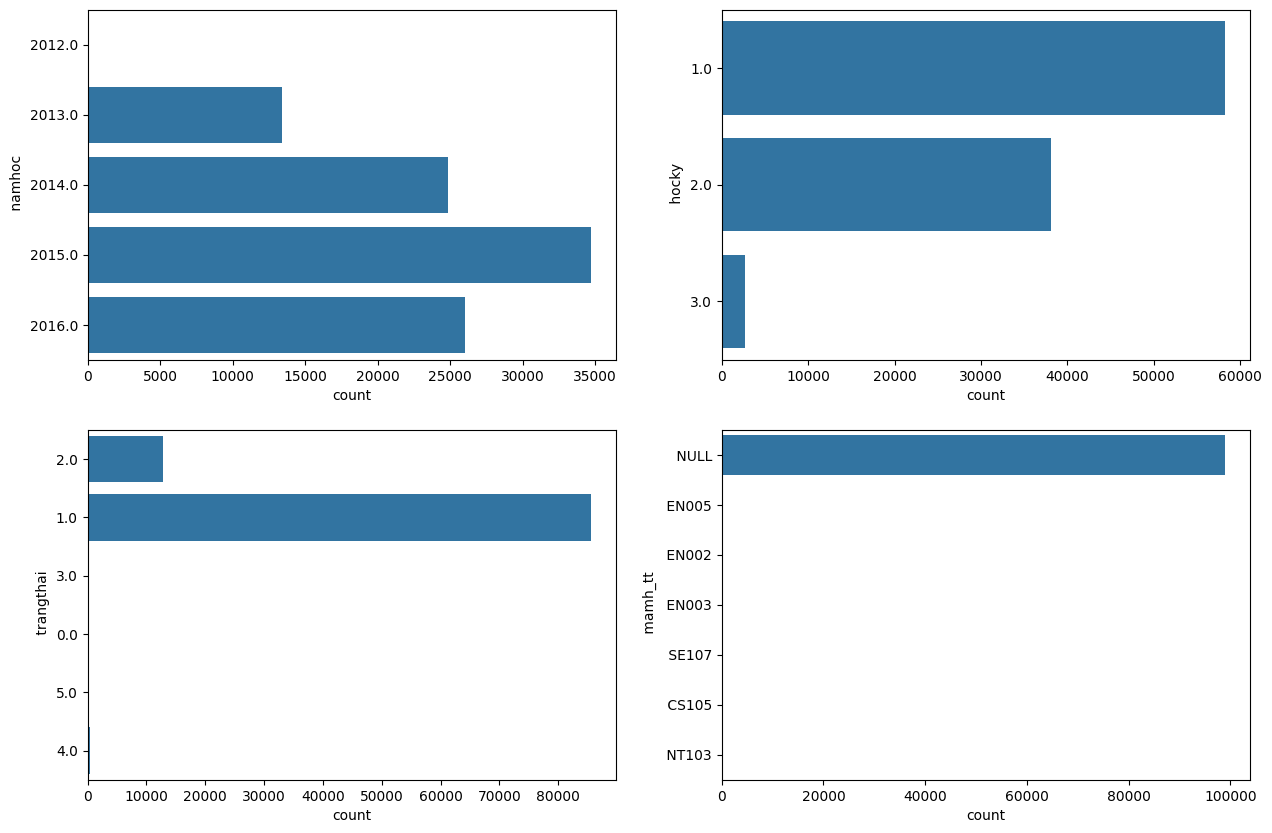

In [117]:
# Trực quan hóa tần suất các giá trị đặc trưng dữ liệu rời rạc
col = 2
row = int(math.ceil(len(diem_categorical_plot_feature) / col))
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for index, df_col in enumerate(diem_categorical_plot_feature):
    plt.subplot(row, col, index + 1)
    sns.countplot(diem_df[df_col])
plt.show()

In [118]:
# Xuất dữ liệu sau khi xử lý
diem_df.to_excel("processed_02_diem.xlsx")